<a href="https://colab.research.google.com/github/pix2712/Face-ID/blob/main/FaceID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train = ImageDataGenerator(rescale = 1./255)
validation = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory('/content/gdrive/MyDrive/Exam/Face ID/Train',target_size=(150,150),batch_size=3,class_mode='categorical')
validation_dataset = train.flow_from_directory('/content/gdrive/MyDrive/Exam/Face ID/Validation',target_size=(150,150),batch_size=3,class_mode='categorical')

Found 33 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


In [10]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))



model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=20,batch_size=64
                    ,validation_data=validation_dataset,verbose=1)

Epoch 1/20
11/11 [==============================] - 4s 326ms/step - loss: 1.3371 - accuracy: 0.3939 - val_loss: 1.0653 - val_accuracy: 0.4444
Epoch 2/20
11/11 [==============================] - 3s 303ms/step - loss: 0.9014 - accuracy: 0.6667 - val_loss: 0.8498 - val_accuracy: 0.7222
Epoch 3/20
11/11 [==============================] - 3s 299ms/step - loss: 0.6836 - accuracy: 0.7576 - val_loss: 0.7628 - val_accuracy: 0.5000
Epoch 4/20
11/11 [==============================] - 3s 297ms/step - loss: 0.7921 - accuracy: 0.5455 - val_loss: 0.5862 - val_accuracy: 0.6111
Epoch 5/20
11/11 [==============================] - 3s 294ms/step - loss: 0.3673 - accuracy: 0.8788 - val_loss: 0.3846 - val_accuracy: 0.7778
Epoch 6/20
11/11 [==============================] - 3s 292ms/step - loss: 0.1055 - accuracy: 1.0000 - val_loss: 0.0664 - val_accuracy: 1.0000
Epoch 7/20
11/11 [==============================] - 3s 291ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.2949 - val_accuracy: 0.8889
Epoch 

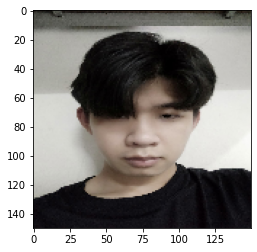

Quang Giao


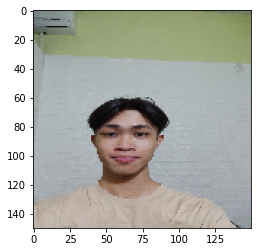

Minh Quân 


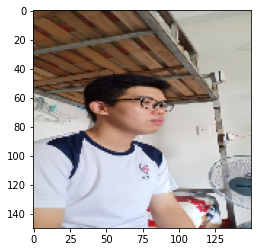

Đức Anh 


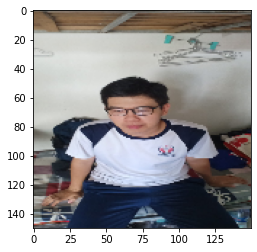

Đức Anh 


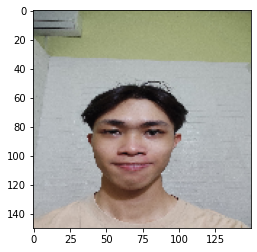

Minh Quân 


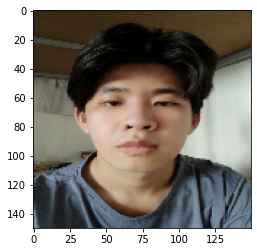

Quang Giao


(1, 150, 150, 3)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '/content/gdrive/MyDrive/Exam/Face ID/Test'
for i in range (6):
    img = load_img(path+'//'+str(i+1)+'.jpg',target_size=(150,150))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    img=np.reshape(img,(1,150,150,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model.predict(img))
    if predict==0:
      print("Quang Giao")
    elif predict==1: 
      print("Minh Quân ")
    elif predict==2: 
      print("Đức Anh ")


img.shape

In [12]:
train_dataset.class_indices

{'Giao': 0, 'Quân': 1, 'Đức Anh': 2}

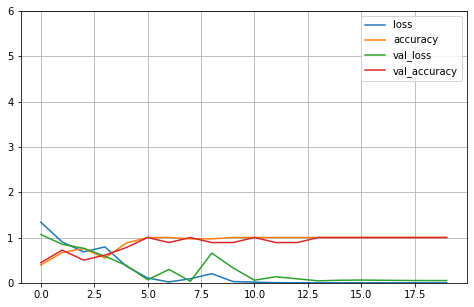

In [13]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


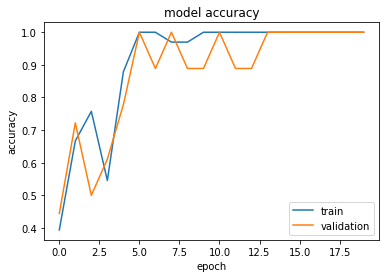

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()

In [17]:
model.save('fID.h5')
model5= load_model('fID.h5')